#  Data Analytics Project – Task 3: Data Visualization

### Objective:
Transform raw data into visual formats like charts and graphs using Matplotlib and Seaborn
 to enhance understanding and reveal insights clearly.

# Step 1: Import Required Libraries

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install wordcloud

Access is denied.


In [5]:
sns.set(style="whitegrid", palette="muted")


# Step 2: Load Dataset

In [6]:
df = pd.read_csv("quotes_dataset.csv")  # Make sure this file exists in your working directory
df.head()


,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


# Step 3: Visualization – Top Authors by Number of Quotes

In [14]:
import pandas as pd

# Load your dataset (make sure the file is in the same folder as the notebook)
df = pd.read_csv("quotes_dataset.csv")

# Now check the column names
print(df.columns)


df.columns = df.columns.str.strip()  # remove spaces if any

top_authors = df['Author'].value_counts().head(10)
print(top_authors)


Index(['Quote', 'Author', 'Tags'], dtype='object')
Author
Albert Einstein      8
J.K. Rowling         6
Marilyn Monroe       6
Dr. Seuss            3
Bob Marley           3
Mother Teresa        2
André Gide           1
Jane Austen          1
Steve Martin         1
Eleanor Roosevelt    1
Name: count, dtype: int64


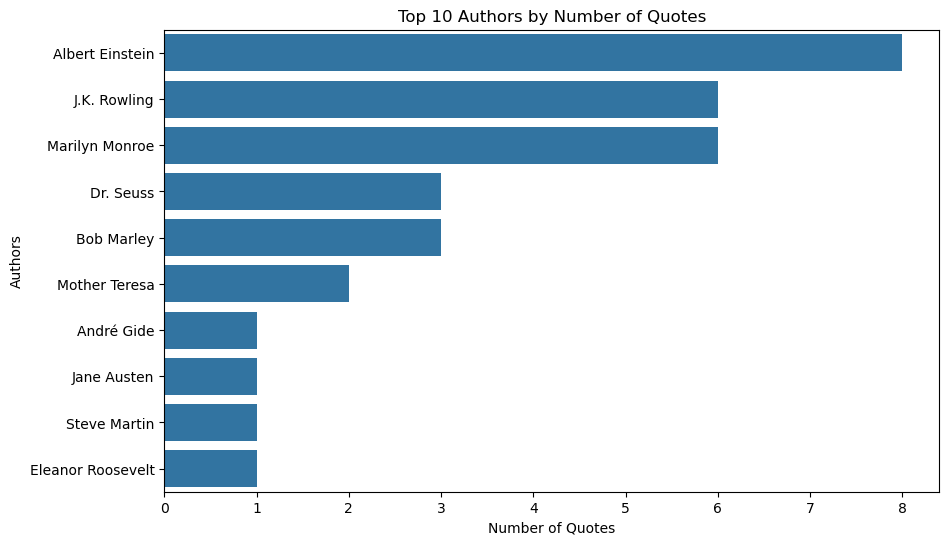

In [19]:

# Make the plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("Top 10 Authors by Number of Quotes")
plt.xlabel("Number of Quotes")
plt.ylabel("Authors")
plt.show()


# Step 4: Visualization – Top Tags

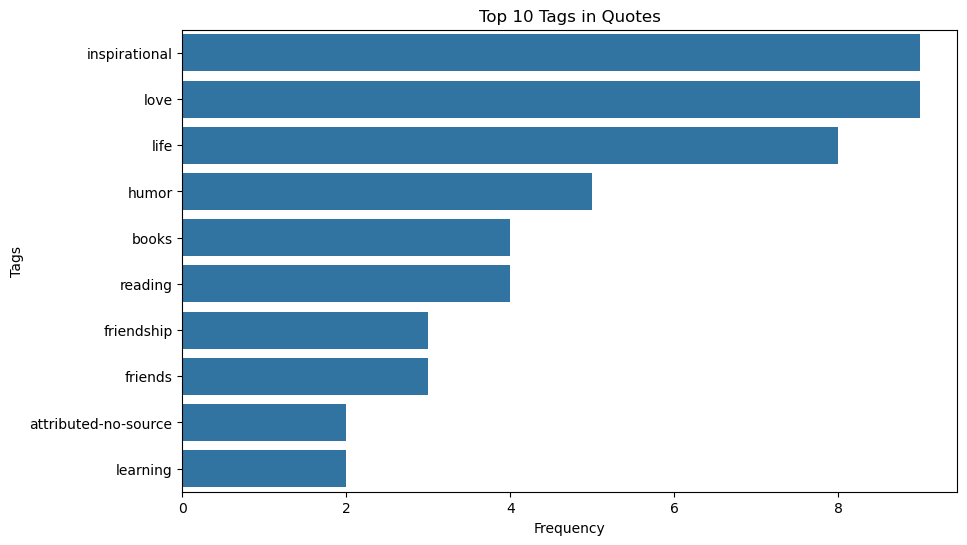

In [20]:
all_tags = df['Tags'].str.split(", ")
all_tags_flat = [tag for sublist in all_tags.dropna() for tag in sublist]

tags_df = pd.Series(all_tags_flat).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=tags_df.values, y=tags_df.index)
plt.title("Top 10 Tags in Quotes")
plt.xlabel("Frequency")
plt.ylabel("Tags")
plt.show()

# Step 5: Visualization – Pie Chart of Top Authors

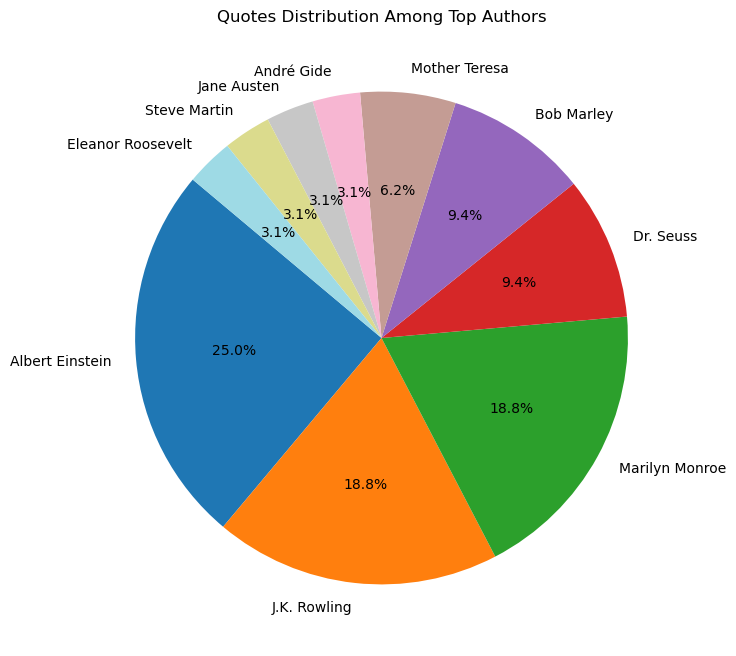

In [21]:
plt.figure(figsize=(8,8))
top_authors.plot.pie(autopct='%1.1f%%', startangle=140, cmap="tab20")
plt.title("Quotes Distribution Among Top Authors")
plt.ylabel("")
plt.show()

# Step 6: Visualization – Word Cloud of Tags

Columns in dataset: Index(['Quote', 'Author', 'Tags'], dtype='object')


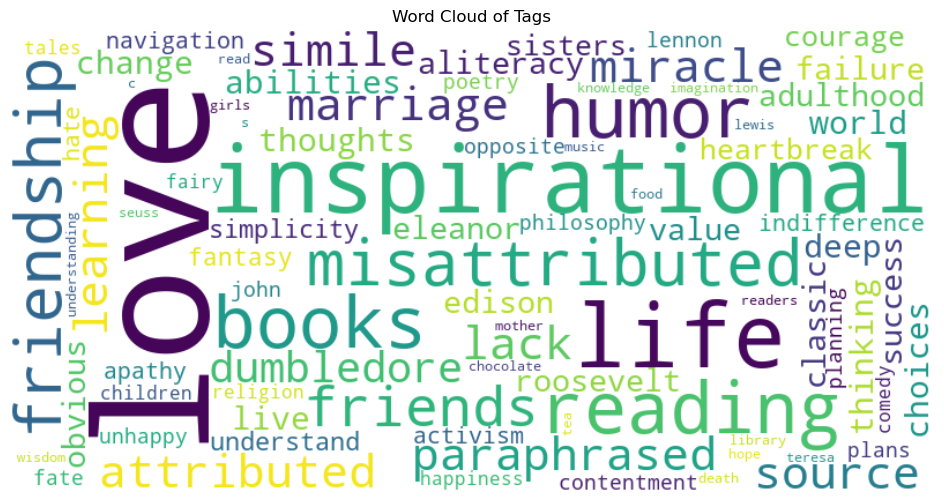

In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("quotes_dataset.csv")

# Show available columns
print("Columns in dataset:", df.columns)

# Handle Tags column safely
if "Tags" in df.columns:
    df['Tags'] = df['Tags'].fillna("").apply(lambda x: str(x).split(','))
    
    # Flatten all tags
    all_tags = df['Tags'].tolist()
    all_tags_flat = [tag.strip() for sublist in all_tags for tag in sublist if tag.strip()]

    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_tags_flat))

    # Plot
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Tags")
    plt.show()
else:
    print("⚠️ No 'Tags' column found in dataset.")

